Inserting all libraries that will need.
Reading dataset using pandas.

In [2]:
import pandas as pd
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report


df = pd.read_csv('neo.csv')

Displaying the first five rows of the dataset.

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


We are dropping unneccesary columns that are not needed for analysis.

In [ ]:
df = df.drop(columns=['id', 'name'])

if len(df['orbiting_body'].unique()) > 1:
    df = pd.get_dummies(df, columns=['orbiting_body'], drop_first=True)
else:
    df = df.drop(columns=['orbiting_body'])

df['sentry_object'] = df['sentry_object'].astype(int)
df['hazardous'] = df['hazardous'].astype(int)


We defined the target variable for predictions: Hazardous.

Then we are splitting our dataset into:
training -> 80% 
testing -> 20%

In [ ]:
TARGET_COLUMN = 'hazardous'
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


We initialize an XGBoost classifier and train it on the training dataset.

    objective='binary:logistic' -> binary classification with logistic regression.
    n_estimators=100 -> Number of trees.
    learning_rate=0.1 -> How much each tree contribute.
    max_depth=3 -> Maximum depth of each tree.
    use_label_encoder=False ->  
    eval_metric='logloss' -> Metric used to evaluate model performance.
    random_state=42 -> Ensuring will get same split each time.

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


C:\Users\MRUGAKSHI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [20:32:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Use the model to make predictions.
Predict target values for test data.

In [ ]:
y_pred = xgb_model.predict(X_test)


Here, calculating accuracy, precision, recall and f1-score of the model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 91.4575
Precision: 0.8375
Recall   : 0.1516
F1-score : 0.2567

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     16400
           1       0.84      0.15      0.26      1768

    accuracy                           0.91     18168
   macro avg       0.88      0.57      0.61     18168
weighted avg       0.91      0.91      0.89     18168



The confusion matrix shows correct and wrong predictions.


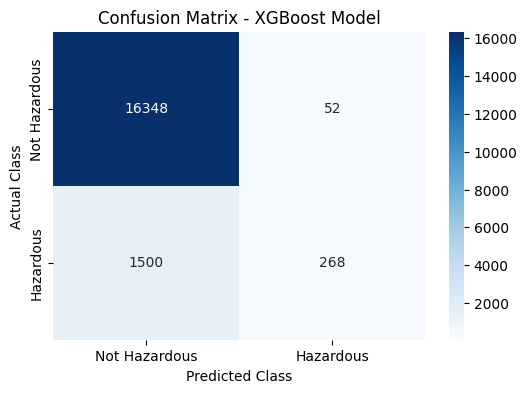

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, 
    annot=True,       # show counts in cells
    fmt='d',          # integer format
    cmap='Blues',     # color map
    xticklabels=['Not Hazardous', 'Hazardous'], 
    yticklabels=['Not Hazardous', 'Hazardous']
)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()
